In [62]:
import numpy as np
from matplotlib import pyplot as plt


In [91]:
f = open('res.txt', 'r')
res = (f.read())


In [92]:
accs = {}
layer_type = 'none'

for line in res.splitlines():
    if line.startswith('0'):
        if layer_type not in accs:
            accs[layer_type] = []
        accs[layer_type].append([float(acc) for acc in line.split()])
    else:
        layer_type = line


In [82]:
def plot(keys, title=None):
    for key in keys:
        value = accs[key]
        value = np.asarray(value)
        means = np.mean(value, axis=0)
        std = np.std(value, axis=0)
        max_std = np.max(std)

        label = str(key) + ' ($\sigma=$' + str(round(max_std, 3))[1:] + ')'
        plt.plot(means, label=label)

        # print(key, np.mean(means))

    # show legend
    plt.legend()
    # set title
    if title is not None:
        plt.title(title)


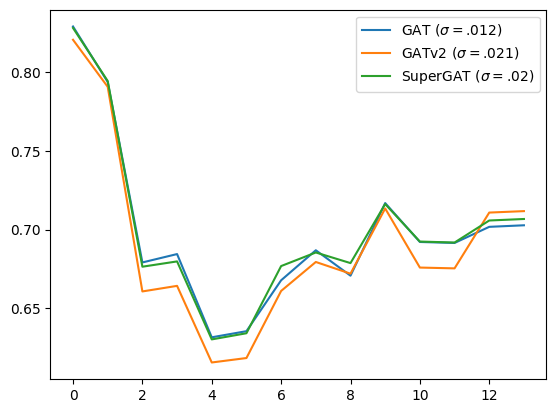

In [96]:
plot(['GAT', 'GATv2', 'SuperGAT'])


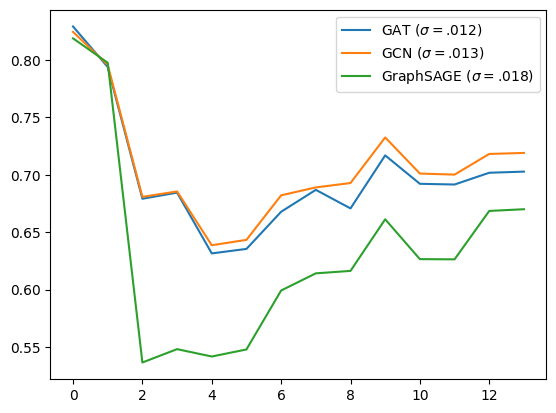

In [97]:
plot(['GAT', 'GCN', 'GraphSAGE'])


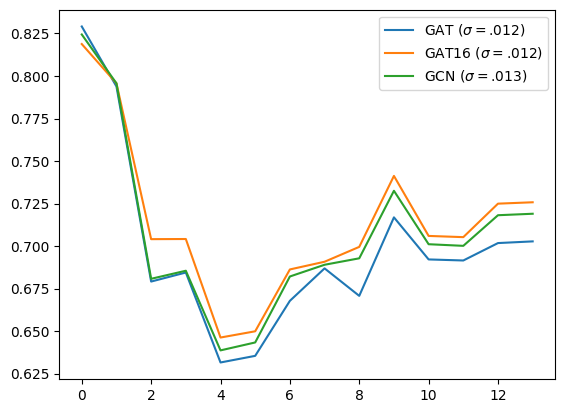

In [98]:
plot(['GAT', 'GAT16', 'GCN'])


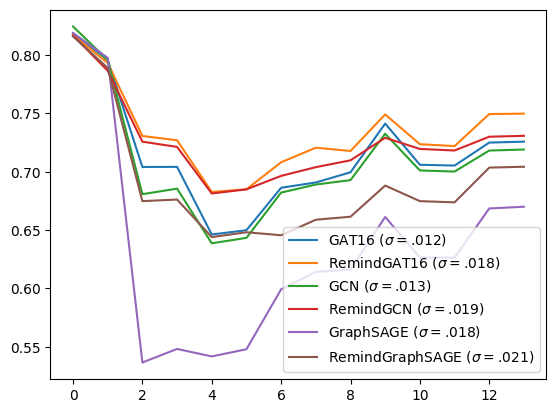

In [99]:
plot(['GAT16', 'RemindGAT16', 'GCN', 'RemindGCN', 'GraphSAGE', 'RemindGraphSAGE'])


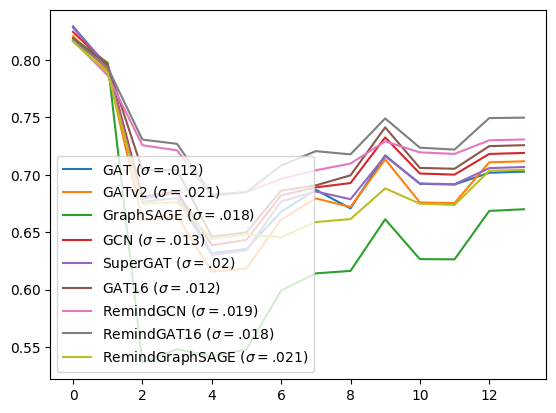

In [95]:
plot(accs.keys())
